Adding white-noise channels or all-zeros channels to MNIST



In [23]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

Training the same model on MNIST data with noise channels or all-zero channels

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.6171 - accuracy: 0.8118 - val_loss: 0.2884 - val_accuracy: 0.9122
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2516 - accuracy: 0.9210 - val_loss: 0.2253 - val_accuracy: 0.9279
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1595 - accuracy: 0.9517 - val_loss: 0.1493 - val_accuracy: 0.9558
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1134 - accuracy: 0.9646 - val_loss: 0.1661 - val_accuracy: 0.9532
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0824 - accuracy: 0.9740 - val_loss: 0.1336 - val_accuracy: 0.9617
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0607 - accuracy: 0.9805 - val_loss: 0.1109 - val_accuracy: 0.9687
Epoch 7/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0444 - accuracy: 0.9857 - val_loss: 0.1227 - val_accuracy: 0.9673
Epoch 

Plotting a validation accuracy comparison

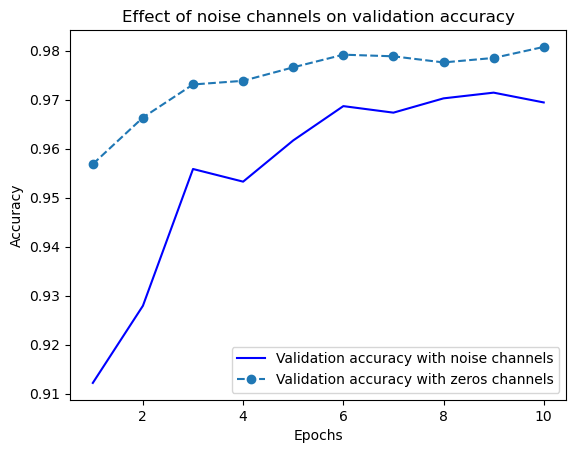

In [25]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "o--",#修改處
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# The nature of generalization in deep learning

Fitting a MNIST model with randomly shuffled labels

In [27]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=10,#epochs改為10
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3161 - accuracy: 0.1035 - val_loss: 2.3060 - val_accuracy: 0.1063
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3001 - accuracy: 0.1183 - val_loss: 2.3123 - val_accuracy: 0.1041
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2912 - accuracy: 0.1240 - val_loss: 2.3154 - val_accuracy: 0.1057
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2771 - accuracy: 0.1400 - val_loss: 2.3250 - val_accuracy: 0.1018
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2600 - accuracy: 0.1528 - val_loss: 2.3424 - val_accuracy: 0.1042
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2392 - accuracy: 0.1688 - val_loss: 2.3527 - val_accuracy: 0.1018
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2144 - accuracy: 0.1823 - val_loss: 2.3657 - val_accuracy: 0.1005
Epoch 

# Tuning key gradient descent parameters
Training a MNIST model with an incorrectly high learning rate

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1162.1332 - accuracy: 0.4422 - val_loss: 2.3584 - val_accuracy: 0.3296
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 6.0923 - accuracy: 0.2903 - val_loss: 3.6890 - val_accuracy: 0.3348
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 3.2001 - accuracy: 0.2866 - val_loss: 2.2828 - val_accuracy: 0.2715
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 3.1906 - accuracy: 0.2602 - val_loss: 2.4399 - val_accuracy: 0.2488
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7616 - accuracy: 0.2707 - val_loss: 2.2705 - val_accuracy: 0.2693
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.8757 - accuracy: 0.3019 - val_loss: 2.3686 - val_accuracy: 0.3064
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 3.0734 - accuracy: 0.2910 - val_loss: 2.3380 - val_accuracy: 0.3254
Epo

The same model with a more appropriate learning rate

In [8]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3939 - accuracy: 0.9085 - val_loss: 0.1613 - val_accuracy: 0.9527
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1392 - accuracy: 0.9635 - val_loss: 0.1578 - val_accuracy: 0.9639
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1124 - accuracy: 0.9729 - val_loss: 0.2146 - val_accuracy: 0.9610
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0982 - accuracy: 0.9785 - val_loss: 0.1827 - val_accuracy: 0.9722
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0843 - accuracy: 0.9822 - val_loss: 0.2165 - val_accuracy: 0.9708
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0770 - accuracy: 0.9844 - val_loss: 0.2302 - val_accuracy: 0.9733
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0688 - accuracy: 0.9870 - val_loss: 0.2214 - val_accuracy: 0.9730
Epoch 

# Leveraging better architecture priors
Increasing model capacity


A simple logistic regression on MNIST

In [9]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.6732 - accuracy: 0.8328 - val_loss: 0.3592 - val_accuracy: 0.9013
Epoch 2/20
375/375 [==============================] - 0s 807us/step - loss: 0.3522 - accuracy: 0.9028 - val_loss: 0.3092 - val_accuracy: 0.9142
Epoch 3/20
375/375 [==============================] - 0s 807us/step - loss: 0.3161 - accuracy: 0.9116 - val_loss: 0.2906 - val_accuracy: 0.9201
Epoch 4/20
375/375 [==============================] - 0s 868us/step - loss: 0.2996 - accuracy: 0.9166 - val_loss: 0.2807 - val_accuracy: 0.9226
Epoch 5/20
375/375 [==============================] - 0s 808us/step - loss: 0.2898 - accuracy: 0.9187 - val_loss: 0.2756 - val_accuracy: 0.9244
Epoch 6/20
375/375 [==============================] - 0s 861us/step - loss: 0.2832 - accuracy: 0.9210 - val_loss: 0.2721 - val_accuracy: 0.9264
Epoch 7/20
375/375 [==============================] - 0s 810us/step - loss: 0.2784 - accuracy: 0.9224 - val_loss: 0.2698 - val_accuracy: 0

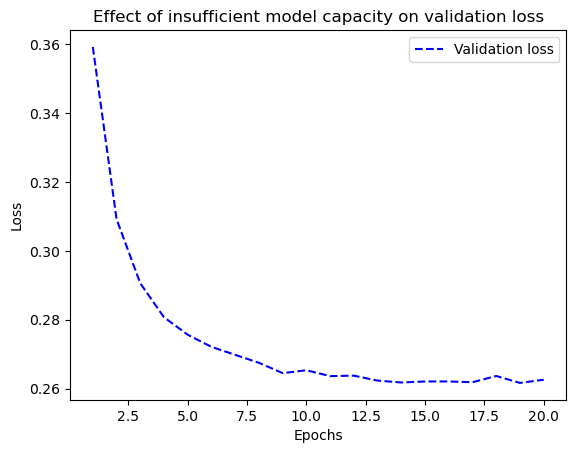

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [11]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3628 - accuracy: 0.8950 - val_loss: 0.2071 - val_accuracy: 0.9348
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1616 - accuracy: 0.9524 - val_loss: 0.1391 - val_accuracy: 0.9591
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9655 - val_loss: 0.1149 - val_accuracy: 0.9641
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9731 - val_loss: 0.0948 - val_accuracy: 0.9717
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9781 - val_loss: 0.0881 - val_accuracy: 0.9744
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0555 - accuracy: 0.9836 - val_loss: 0.0952 - val_accuracy: 0.9727
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0930 - val_accuracy: 0.9748
Epoch 

# Improving generalization


Dataset curation
Feature engineering
Using early stopping
Regularizing your model
Reducing the network's size
Original model

In [12]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5098 - accuracy: 0.7857 - val_loss: 0.3835 - val_accuracy: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3040 - accuracy: 0.9029 - val_loss: 0.3200 - val_accuracy: 0.8767
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2208 - accuracy: 0.9311 - val_loss: 0.2842 - val_accuracy: 0.8865
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1752 - accuracy: 0.9430 - val_loss: 0.2771 - val_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1394 - accuracy: 0.9563 - val_loss: 0.2817 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1181 - accuracy: 0.9636 - val_loss: 0.2974 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0986 - accurac

# Version of the model with lower capacity

In [13]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.6180 - accuracy: 0.6336 - val_loss: 0.5645 - val_accuracy: 0.7943
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5231 - accuracy: 0.8010 - val_loss: 0.5105 - val_accuracy: 0.8382
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4694 - accuracy: 0.8679 - val_loss: 0.4817 - val_accuracy: 0.8223
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4298 - accuracy: 0.8989 - val_loss: 0.4581 - val_accuracy: 0.8469
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3961 - accuracy: 0.9197 - val_loss: 0.4357 - val_accuracy: 0.8733
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3664 - accuracy: 0.9383 - val_loss: 0.4324 - val_accuracy: 0.8627
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3409 - accuracy: 0.9493 - val_loss: 0.4178 - val_accuracy: 0.8741
Epoch 8/20
30

Version of the model with higher capacity

In [14]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 149ms/step - loss: 0.5401 - accuracy: 0.7640 - val_loss: 0.3162 - val_accuracy: 0.8759
Epoch 2/20
30/30 [==============================] - 4s 125ms/step - loss: 0.2531 - accuracy: 0.8954 - val_loss: 0.2657 - val_accuracy: 0.8928
Epoch 3/20
30/30 [==============================] - 4s 126ms/step - loss: 0.1368 - accuracy: 0.9485 - val_loss: 0.2847 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 4s 132ms/step - loss: 0.0691 - accuracy: 0.9764 - val_loss: 0.3658 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 4s 146ms/step - loss: 0.1047 - accuracy: 0.9780 - val_loss: 0.3462 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 4s 138ms/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 0.5298 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 4s 133ms/step - loss: 8.8425e-04 - accuracy: 0.9999 - val_loss: 0.6379 - val_accuracy: 0.8895
Ep

# Adding weight regularization
Adding L2 weight regularization to the model

In [15]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5810 - accuracy: 0.7906 - val_loss: 0.4557 - val_accuracy: 0.8700
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3933 - accuracy: 0.8947 - val_loss: 0.4019 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3325 - accuracy: 0.9140 - val_loss: 0.3820 - val_accuracy: 0.8744
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2979 - accuracy: 0.9255 - val_loss: 0.3532 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2779 - accuracy: 0.9331 - val_loss: 0.3521 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2645 - accuracy: 0.9371 - val_loss: 0.3522 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2550 - accuracy: 0.9387 - val_loss: 0.3552 - val_accuracy: 0.8846
Epoch 8/20
30

Different weight regularizers available in Keras

In [16]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

# Adding dropout
Adding dropout to the IMDB model

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.6246 - accuracy: 0.6431 - val_loss: 0.4953 - val_accuracy: 0.8525
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4928 - accuracy: 0.7785 - val_loss: 0.4187 - val_accuracy: 0.8302
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4050 - accuracy: 0.8295 - val_loss: 0.3225 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3458 - accuracy: 0.8622 - val_loss: 0.2965 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3063 - accuracy: 0.8835 - val_loss: 0.2764 - val_accuracy: 0.8911
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2677 - accuracy: 0.9055 - val_loss: 0.2749 - val_accuracy: 0.8917
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2413 - accuracy: 0.9169 - val_loss: 0.2870 - val_accuracy: 0.8907
Epoch 8/20
30